In [46]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

In [1]:


# Open the Zarr store
ds_no_hw_zarr = xr.open_zarr('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/zarr/NO_HW')
ds_hw_zarr = xr.open_zarr('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/zarr/HW')



In [48]:
ds_hw_zarr

<xarray.Dataset> Size: 3TB
Dimensions:        (time: 262800, lat: 192, lon: 288)
Coordinates:
  * lat            (lat) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon            (lon) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time           (time) datetime64[ns] 2MB 1985-01-01 ... 2014-12-31T23:00:00
Data variables: (12/55)
    APPAR_TEMP     (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    APPAR_TEMP_R   (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    APPAR_TEMP_U   (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT    (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT_R  (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT_U  (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    ...             ...
    VAPOR_PRES_U   (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    WASTEHEAT      (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    WBA            (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    WBA_R          (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    WBA_U          (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
    WIND           (time, lat, lon) float32 58GB dask.array<chunksize=(2232, 96, 144), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                               CF-1.0
    Initial_conditions_dataset:                i.e215.I2000Clm50SpGs.hw_spinu...
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    Surface_dataset:                           surfdata_0.9x1.25_hist_16pfts_...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...
    Time_constant_3Dvars_filename:             ./i.e215.I2000Clm50SpGs.hw_pro...
    ...                                        ...
    revision_id:                               $Id: histFileMod.F90 42903 201...
    source:                                    Community Land Model CLM4.0
    time_period_freq:                          hour_1
    title:                                     CLM History file information
    username:                                  jguo
    version:                                   release-cesm2.1.5

In [47]:
def convert_time_to_local_and_add_hour(df):
    def calculate_timezone_offset(longitude):
        return np.floor(longitude / 15.0).astype(int)

    offsets = calculate_timezone_offset(df['lon'].values)
    df['local_time'] = df['time'] + pd.to_timedelta(offsets, unit='h')
    df['local_hour'] = df['local_time'].dt.hour
    return df

In [2]:
var = 'FSH'

In [3]:
data_array_no_hw = ds_no_hw_zarr[var]
mean_data_array_no_hw = data_array_no_hw.mean(dim='time')
data_array_hw = ds_hw_zarr[var]
mean_data_array_hw = data_array_hw.mean(dim='time')
diff_data_array = mean_data_array_hw - mean_data_array_no_hw

df_no_hw = mean_data_array_no_hw.to_dataframe().reset_index()
df_hw = mean_data_array_hw.to_dataframe().reset_index()
df_diff = diff_data_array.to_dataframe().reset_index()
df_diff 


In [5]:
df_diff.dropna(subset=['FSH'], inplace=True)

In [ ]:
daytime_mask = local_hour_adjusted_df['local_hour'].between(8, 16)
nighttime_mask = (local_hour_adjusted_df['local_hour'].between(20, 24) | local_hour_adjusted_df['local_hour'].between(0, 4))

In [ ]:
sandbox

In [ ]:
df_diff 

In [7]:
#sort by FSH
df_diff.sort_values(by='FSH', inplace=True)
df_diff

,lat,lon,FSH
46680,62.670158,30.00,-62.555771
46400,61.727749,40.00,-58.072899
46107,60.785339,33.75,-57.899498
45816,59.842934,30.00,-57.386387
45817,59.842934,31.25,-54.738930
...,...,...,...
33466,19.319372,72.50,62.936443
34923,24.031414,93.75,71.656624
31492,12.722513,125.00,72.653252
35500,25.916231,95.00,73.323868


In [11]:
# from ds_no_hw_zarr and ds_hw_zarr get the time series of FSH at a specific location (62.670158,30.00)
hw = ds_hw_zarr['FSH'].sel(lat=62.670158, lon=30.00)
no_hw = ds_no_hw_zarr['FSH'].sel(lat=62.670158, lon=30.00)

In [29]:
hw

<xarray.DataArray 'FSH' (time: 254040)> Size: 1MB
dask.array<where, shape=(254040,), dtype=float32, chunksize=(2232,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 4B 62.67
    lon      float32 4B 30.0
  * time     (time) datetime64[ns] 2MB 1985-01-01 ... 2013-12-31T23:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     sensible heat not including correction for land use change...
    units:         W/m^2

In [40]:
no_hw

<xarray.DataArray 'FSH' (time: 254040)> Size: 1MB
dask.array<where, shape=(254040,), dtype=float32, chunksize=(2232,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 4B 62.67
    lon      float32 4B 30.0
  * time     (time) datetime64[ns] 2MB 1985-01-01 ... 2013-12-31T23:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     sensible heat not including correction for land use change...
    units:         W/m^2

In [25]:
hw.mean().values

array(-19.906162, dtype=float32)

In [26]:

no_hw.mean().values

array(42.5907, dtype=float32)

In [23]:
#filter out data after 2014
hw = hw.where(hw['time.year'] < 2014, drop=True)

In [24]:
no_hw = no_hw.where(no_hw['time.year'] < 2014, drop=True)

In [37]:
#hw has hourly data, now I only print hw unique dates
np.unique(hw['time'].dt.date.values).size


10585

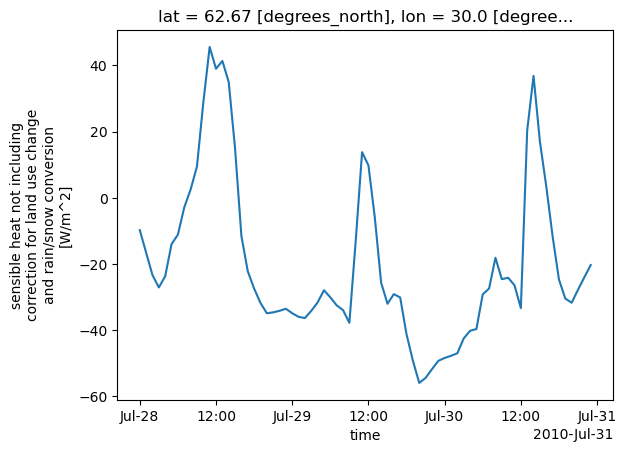

In [38]:
hw.plot()


In [43]:
df_hw = hw.to_dataframe().reset_index().dropna()

In [44]:
df_hw

,time,lat,lon,FSH
223992,2010-07-28 00:00:00,62.670158,30.0,-9.766591
223993,2010-07-28 01:00:00,62.670158,30.0,-16.612816
223994,2010-07-28 02:00:00,62.670158,30.0,-23.378267
223995,2010-07-28 03:00:00,62.670158,30.0,-27.099506
223996,2010-07-28 04:00:00,62.670158,30.0,-23.697515
...,...,...,...,...
224059,2010-07-30 19:00:00,62.670158,30.0,-30.459087
224060,2010-07-30 20:00:00,62.670158,30.0,-31.713335
224061,2010-07-30 21:00:00,62.670158,30.0,-27.797550
224062,2010-07-30 22:00:00,62.670158,30.0,-24.003935


In [45]:
df_no_hw = no_hw.to_dataframe().reset_index().dropna()
df_no_hw

,time,lat,lon,FSH
3624,1985-06-01 00:00:00,62.670158,30.0,-13.620049
3625,1985-06-01 01:00:00,62.670158,30.0,-16.824915
3626,1985-06-01 02:00:00,62.670158,30.0,-13.593063
3627,1985-06-01 03:00:00,62.670158,30.0,-10.274778
3628,1985-06-01 04:00:00,62.670158,30.0,5.176535
...,...,...,...,...
251107,2013-08-31 19:00:00,62.670158,30.0,-13.779382
251108,2013-08-31 20:00:00,62.670158,30.0,-11.838862
251109,2013-08-31 21:00:00,62.670158,30.0,-10.546904
251110,2013-08-31 22:00:00,62.670158,30.0,-9.883479
